# Sales Analysis

#### Importing libraries

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt

#### Merging 12 months sales data

In [2]:
files = [i for i in os.listdir('//Mac/Home/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/')]

df = pd.DataFrame()

for file in files:
    df1 = pd.read_csv('//Mac/Home/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    df = pd.concat([df,df1])
    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df.dropna(how='all',inplace=True)

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df.value_counts()

Order ID  Product                   Quantity Ordered  Price Each  Order Date      Purchase Address                    
Order ID  Product                   Quantity Ordered  Price Each  Order Date      Purchase Address                        355
158236    AA Batteries (4-pack)     1                 3.84        02/19/19 09:49  319 West St, San Francisco, CA 94016      2
315204    Wired Headphones          1                 11.99       12/12/19 12:41  680 6th St, San Francisco, CA 94016       2
256196    USB-C Charging Cable      1                 11.95       09/27/19 21:09  253 6th St, Boston, MA 02215              2
256763    27in FHD Monitor          1                 149.99      09/15/19 22:28  23 11th St, San Francisco, CA 94016       2
                                                                                                                         ... 
200687    Lightning Charging Cable  1                 14.95       05/11/19 11:31  878 7th St, Atlanta, GA 30301             1

In [8]:
df[df['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
df = df[~(df['Order ID']=='Order ID')]

In [10]:
df.duplicated().sum()

264

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = df['Order Date'].astype('datetime64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


#### What was the best month for sales? How much was earned that month?

In [14]:
df['month'] = df['Order Date'].dt.strftime('%B')
df['sales'] = df['Quantity Ordered']*df['Price Each']


In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95


In [16]:
(df.groupby('month').agg({'sales':'sum'}).sort_values('sales',ascending=False).reset_index()).iloc[0]

month     December
sales    4608295.7
Name: 0, dtype: object

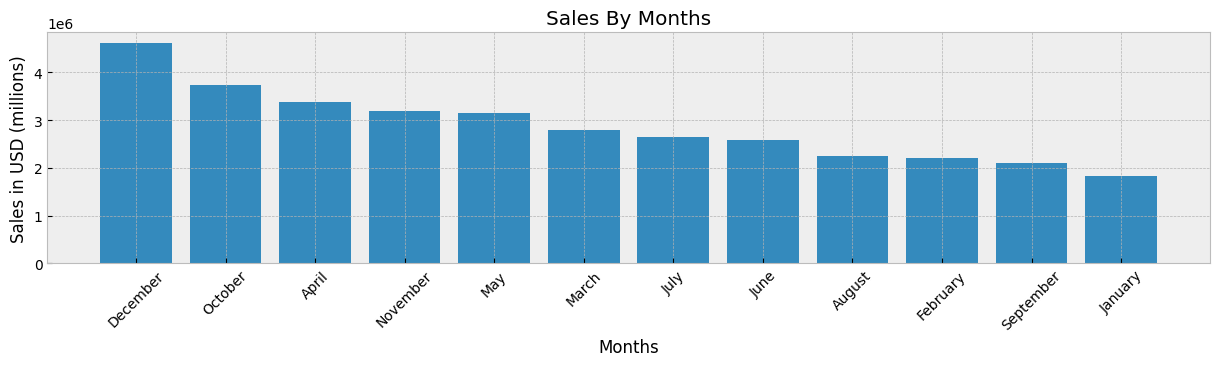

In [17]:
SalesSumByMonth = df.groupby('month').agg({'sales':'sum'}).sort_values('sales',ascending=False).reset_index()
monthname = SalesSumByMonth['month']
Sales = SalesSumByMonth['sales']

plt.style.use('bmh')
plt.figure(figsize=(15,3))
plt.title('Sales By Months')
plt.xlabel('Months')
plt.ylabel('Sales in USD (millions)')
plt.xticks(rotation=45)

plt.bar(monthname,Sales)

plt.show()

#### Which City had the highest Sales?

In [18]:
#df['city'] = df['Purchase Address'].str.split(',').str[1].str.strip() or
df['city'] = df['Purchase Address'].apply(lambda x : x.split(',')[1].strip())

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta


In [20]:
df.groupby('city').agg({'sales':'sum'}).sort_values('sales',ascending=False).reset_index().iloc[0]

city     San Francisco
sales       8254743.55
Name: 0, dtype: object

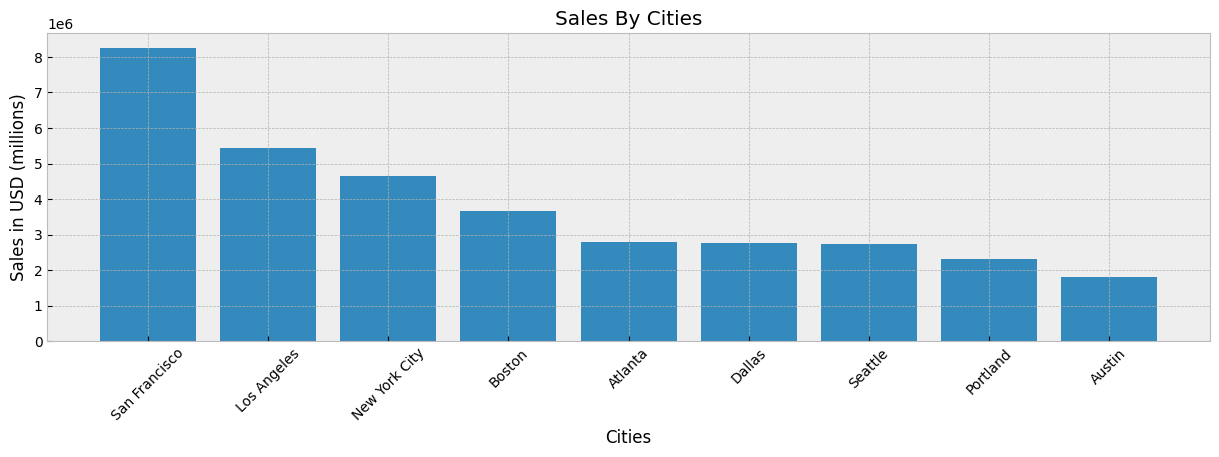

In [21]:
SalesSumByCity = df.groupby('city').agg({'sales':'sum'}).sort_values('sales',ascending=False).reset_index()
City = SalesSumByCity['city']
Sales = SalesSumByCity['sales']

plt.figure(figsize=(15,4))
plt.title('Sales By Cities')
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Sales in USD (millions)')
plt.bar(City,Sales)
plt.show()



#### What time should we display advertisements to maximize likelihood of customer's buying product?

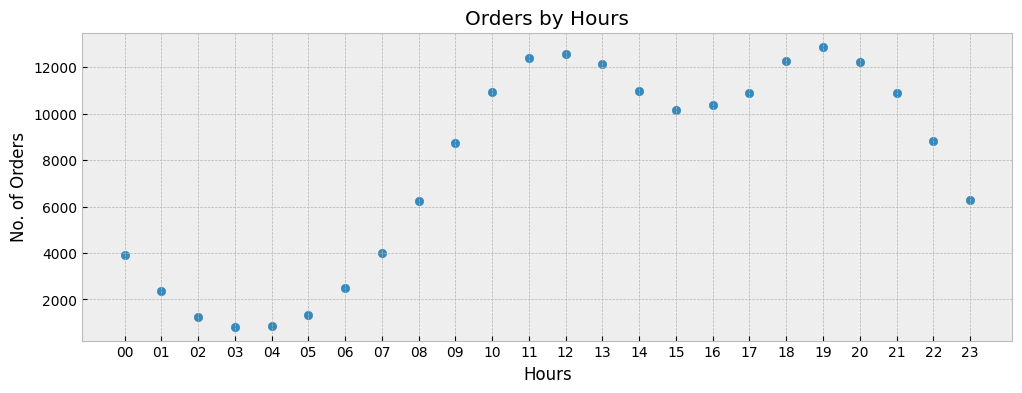

In [22]:
SalesByHour = df.groupby(df['Order Date'].dt.strftime('%H')).agg({'Order ID':'count'}).reset_index()
SalesByHour.rename(columns={'Order Date':'Hour'},inplace=True)
hour = SalesByHour['Hour']
OrderCount = SalesByHour['Order ID']

plt.figure(figsize=(12,4))
plt.scatter(hour,OrderCount)
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.title('Orders by Hours')
plt.show()

In [23]:
#around 12noon and 7pm

#### What products are most often sold together?

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta


In [25]:
df['Order ID'].duplicated().sum()

7249

In [26]:
ProductByOrder = df.groupby('Order ID').agg(Products=('Product',lambda x: ','.join(x)),ProductCount=('Product','count')).reset_index()
MultipleProductByOrder = ProductByOrder[ProductByOrder['ProductCount']>1][['Order ID','Products']]
MultipleProductByOrder.groupby('Products').agg(CountOfOrders=('Order ID','count')).sort_values('CountOfOrders',ascending=False).reset_index().iloc[:5]


,Products,CountOfOrders
0,"iPhone,Lightning Charging Cable",886
1,"Google Phone,USB-C Charging Cable",857
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


In [27]:
# iPhone with Lightning Charging Cable most often sold together (886 times)
# followed by Google Phone with USB-C Charging Cable (857 times)

#### What product sold the most? Why do you think it sold the most?

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta


In [29]:
df.groupby('Product').agg(TotalQuantity=('Quantity Ordered','sum')).\
sort_values('TotalQuantity',ascending=False).reset_index().iloc[:5]

,Product,TotalQuantity
0,AAA Batteries (4-pack),30986
1,AA Batteries (4-pack),27615
2,USB-C Charging Cable,23931
3,Lightning Charging Cable,23169
4,Wired Headphones,20524


C:\Users\atish\AppData\Local\Temp\ipykernel_10872\1836669582.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ProductsByQuantity['Product'],rotation=90)


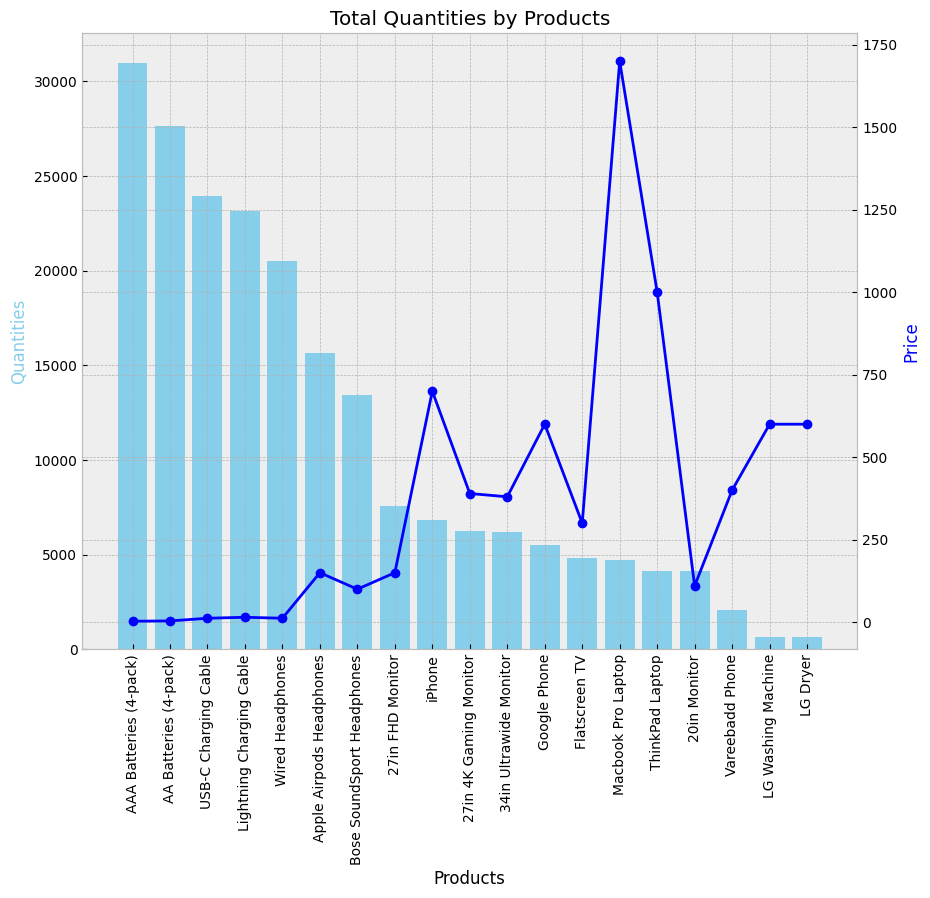

In [30]:
ProductsByQuantity = df.groupby('Product').agg(TotalQuantity=('Quantity Ordered','sum'),Price=('Price Each','mean')).\
sort_values('TotalQuantity',ascending=False).reset_index()

fig,ax1 = plt.subplots(figsize=(10, 8))

ax1.bar(ProductsByQuantity['Product'], ProductsByQuantity['TotalQuantity'], color='skyblue')
ax1.set_xlabel('Products')
ax1.set_xticklabels(ProductsByQuantity['Product'],rotation=90)
ax1.set_ylabel('Quantities',color='skyblue')
ax1.set_title('Total Quantities by Products')

ax2 = ax1.twinx()
ax2.plot(ProductsByQuantity['Product'], ProductsByQuantity['Price'], color='b', marker='o')
ax2.set_ylabel('Price',color='b')

plt.show()